In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


batch_size = 64
 
# MNIST Dataset
train_dataset = datasets.MNIST(root='./mnist_data/',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset += datasets.MNIST(root='./mnist_data/',
                               train=True,
                               transform=transform,
                               download=True)

transform2 =transforms.Compose([transforms.RandomHorizontalFlip( p = 0.5 ), transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset += datasets.MNIST(root='./mnist_data/',
                               train=True,
                               transform=transform2,
                               download=True)

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

class NNModel(torch.nn.Module):
     
    def __init__(self):
        super(NNModel,self).__init__()
        self.l1 = nn.Linear(784,520)
        self.l2 = nn.Linear(520,320)
        self.l3 = nn.Linear(320,240)
        self.l4 = nn.Linear(240,120)
        self.l5 = nn.Linear(120,10)
         
    def forward(self,x):
        # input data : ( n , 1 , 28 , 28 )
        x = x.view(-1,784) # Flatten : ( n , 784 )
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = F.relu(self.l3(x))
        x = F.relu(self.l4(x))
        return self.l5(x)

model = NNModel()
 
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr = 0.01, momentum = 0.5)

def train(epoch):
    model.train()
    for batch_idx,(data,target) in enumerate(train_loader):
         
        data = data.to(device)
        target = target.to(device)
         
        output = model(data)
 
        optimizer.zero_grad()
        loss = criterion(output,target)
        loss.backward()
        optimizer.step()
         
        if batch_idx%50==0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),100. * batch_idx / len(train_loader), loss.data[0]))        

def find(data):
        model.eval()
        data = data.to(device)         
        output = model(data)
        return output
        
for epoch in range(1, 7):
    train(epoch)
    #test()




/Users/sujin/sujin/lib/python3.7/site-packages/ipykernel_launcher.py:78: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


Train Epoch: 1 [0/180000 (0%)]	Loss: 2.302207
Train Epoch: 1 [3200/180000 (2%)]	Loss: 2.296843
Train Epoch: 1 [6400/180000 (4%)]	Loss: 2.292363
Train Epoch: 1 [9600/180000 (5%)]	Loss: 2.275700
Train Epoch: 1 [12800/180000 (7%)]	Loss: 2.282211
Train Epoch: 1 [16000/180000 (9%)]	Loss: 2.262503
Train Epoch: 1 [19200/180000 (11%)]	Loss: 2.256688
Train Epoch: 1 [22400/180000 (12%)]	Loss: 2.219609
Train Epoch: 1 [25600/180000 (14%)]	Loss: 2.190026
Train Epoch: 1 [28800/180000 (16%)]	Loss: 2.028244
Train Epoch: 1 [32000/180000 (18%)]	Loss: 1.790738
Train Epoch: 1 [35200/180000 (20%)]	Loss: 1.524454
Train Epoch: 1 [38400/180000 (21%)]	Loss: 1.383556
Train Epoch: 1 [41600/180000 (23%)]	Loss: 1.137819
Train Epoch: 1 [44800/180000 (25%)]	Loss: 0.948133
Train Epoch: 1 [48000/180000 (27%)]	Loss: 0.971098
Train Epoch: 1 [51200/180000 (28%)]	Loss: 0.735261
Train Epoch: 1 [54400/180000 (30%)]	Loss: 0.769707
Train Epoch: 1 [57600/180000 (32%)]	Loss: 0.666516
Train Epoch: 1 [60800/180000 (34%)]	Loss: 0.

Train Epoch: 3 [150400/180000 (84%)]	Loss: 0.028055
Train Epoch: 3 [153600/180000 (85%)]	Loss: 0.123296
Train Epoch: 3 [156800/180000 (87%)]	Loss: 0.105159
Train Epoch: 3 [160000/180000 (89%)]	Loss: 0.051201
Train Epoch: 3 [163200/180000 (91%)]	Loss: 0.081488
Train Epoch: 3 [166400/180000 (92%)]	Loss: 0.323407
Train Epoch: 3 [169600/180000 (94%)]	Loss: 0.083703
Train Epoch: 3 [172800/180000 (96%)]	Loss: 0.192230
Train Epoch: 3 [176000/180000 (98%)]	Loss: 0.107741
Train Epoch: 3 [179200/180000 (100%)]	Loss: 0.047250
Train Epoch: 4 [0/180000 (0%)]	Loss: 0.087635
Train Epoch: 4 [3200/180000 (2%)]	Loss: 0.095350
Train Epoch: 4 [6400/180000 (4%)]	Loss: 0.054763
Train Epoch: 4 [9600/180000 (5%)]	Loss: 0.175198
Train Epoch: 4 [12800/180000 (7%)]	Loss: 0.220551
Train Epoch: 4 [16000/180000 (9%)]	Loss: 0.266648
Train Epoch: 4 [19200/180000 (11%)]	Loss: 0.101055
Train Epoch: 4 [22400/180000 (12%)]	Loss: 0.232553
Train Epoch: 4 [25600/180000 (14%)]	Loss: 0.080859
Train Epoch: 4 [28800/180000 (16%

Train Epoch: 6 [118400/180000 (66%)]	Loss: 0.035229
Train Epoch: 6 [121600/180000 (68%)]	Loss: 0.105482
Train Epoch: 6 [124800/180000 (69%)]	Loss: 0.031123
Train Epoch: 6 [128000/180000 (71%)]	Loss: 0.045774
Train Epoch: 6 [131200/180000 (73%)]	Loss: 0.050789
Train Epoch: 6 [134400/180000 (75%)]	Loss: 0.037321
Train Epoch: 6 [137600/180000 (76%)]	Loss: 0.089526
Train Epoch: 6 [140800/180000 (78%)]	Loss: 0.100759
Train Epoch: 6 [144000/180000 (80%)]	Loss: 0.036671
Train Epoch: 6 [147200/180000 (82%)]	Loss: 0.107954
Train Epoch: 6 [150400/180000 (84%)]	Loss: 0.053405
Train Epoch: 6 [153600/180000 (85%)]	Loss: 0.181734
Train Epoch: 6 [156800/180000 (87%)]	Loss: 0.135818
Train Epoch: 6 [160000/180000 (89%)]	Loss: 0.006184
Train Epoch: 6 [163200/180000 (91%)]	Loss: 0.112912
Train Epoch: 6 [166400/180000 (92%)]	Loss: 0.030368
Train Epoch: 6 [169600/180000 (94%)]	Loss: 0.089976
Train Epoch: 6 [172800/180000 (96%)]	Loss: 0.025219
Train Epoch: 6 [176000/180000 (98%)]	Loss: 0.164628
Train Epoch:

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

input = cv2.imread("./number3.bmp")

# gray scale
img = cv2.cvtColor(input,cv2.COLOR_BGR2GRAY)


# 가우시안 필터를 이용하여 가우스 잡음을 제거해준다
# img_blur = cv2.GaussianBlur(img, (5,5), 0)
# cv2.imshow("bluring1", img_blur)

# img_blur = cv2.medianBlur(img,3)
# cv2.imshow("bluring2", img_blur)

# 적절한 임계값을 찾아 220으로 정해주었다
ret, img_th = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# plt.figure(figsize=(15,12))
# cv2.imshow("threshold", img_th)

# 모폴로지 연산을 위한
kernel = np.ones((3,3), np.uint8)
kernel1 = np.ones((1,1), np.uint8)

# img_e = cv2.erode(img_th,kernel, iterations = 1)
# cv2.imshow("erode", img_e)

# img_di = cv2.dilate(img_th, kernel, iterations = 2)
# cv2.imshow("dilation", img_di)

# 외곽 추출
image, contours, hierachy = cv2.findContours(img_di.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)



# 여기 좀 수정
rects = [cv2.boundingRect(each) for each in contours[:-1]]


img_result = []
img_for_class = img_di.copy()

margin_pixel = 10

count = 0
for rect in rects:
    # 사각형 그리기
    img_result.append(img_for_class[rect[1]-margin_pixel : rect[1]+rect[3]+margin_pixel, rect[0]-margin_pixel : rect[0]+rect[2]+margin_pixel])

count = 0
nrows = 4
ncols = 9



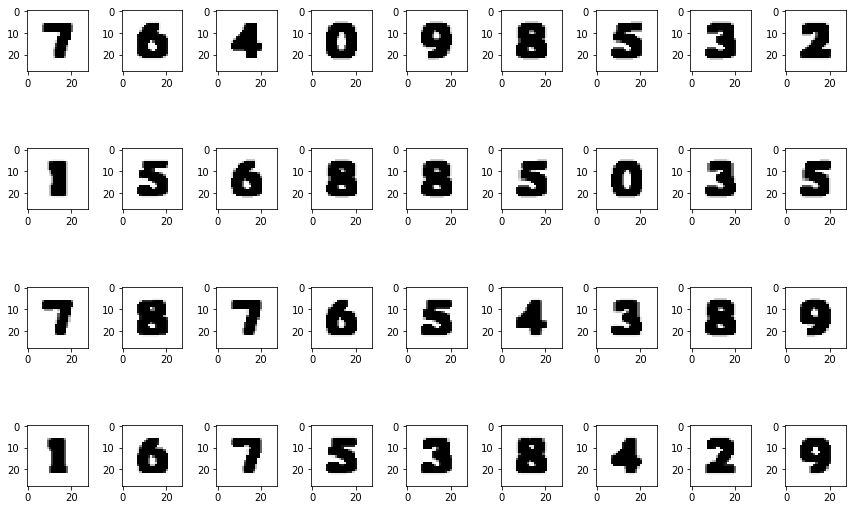

In [3]:
plt.figure(figsize = (12, 8))
for n in img_result :
    count += 1
    plt.subplot(nrows,ncols,count)
    plt.imshow(cv2.resize(n,(28, 28)), cmap="Greys", interpolation = 'nearest')
plt.tight_layout()
plt.show()


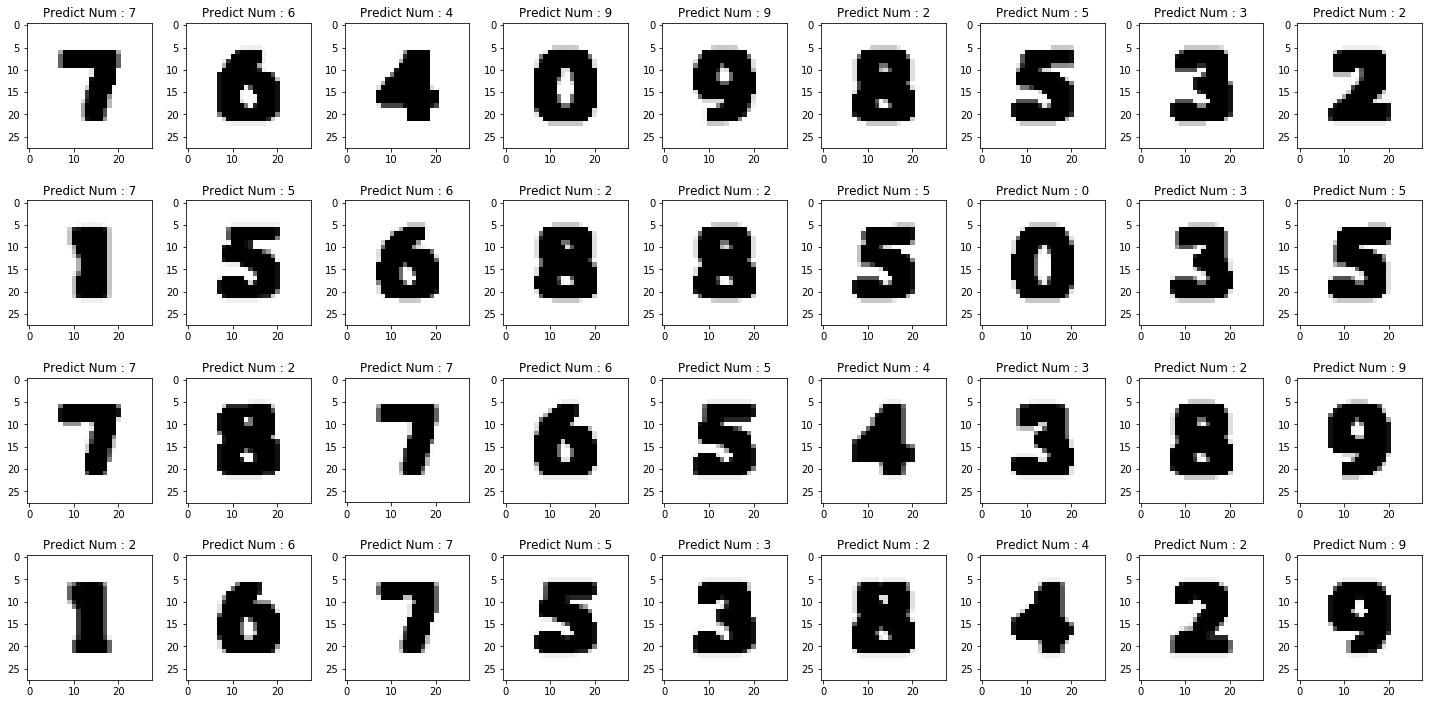

In [ ]:

arr= []

index_list = np.array(arr)

for i in range(len(img_result)):
    temp = cv2.resize(img_result[i], (28,28))
    temp11=temp.astype('float32')/255
    test = torch.from_numpy(temp11)
    output = find(test)
    value , index_temp = torch.max(output,1)
    tt = np.asarray(index_temp)
    index_list = np.concatenate((index_list,tt))

index_list = index_list.astype(int)
index_list = index_list.astype(str)

count = 0
nrows = 4
ncols = 9

plt.figure(figsize = (20, 10))

for n in img_result :
    count += 1
    plt.subplot(nrows,ncols,count)
    plt.imshow(cv2.resize(n,(28, 28)), cmap="Greys", interpolation = 'nearest')
    label = "Predict Num : " + index_list[count-1]
    plt.title(label)

plt.tight_layout()
plt.show()

r = []
g = []
b = []

for i in range(10):
    r.append(random.randint(0, 255))
    g.append(random.randint(0, 255))
    b.append(random.randint(0, 255))


count = 0
for rect in rects:
    # 사각형 그리기
    count += 1
    
    r_index = index_list[count-1].astype(int)
    g_index = index_list[count-1].astype(int)
    b_index = index_list[count-1].astype(int)
    
    mmt = cv2.moments(rect)
    cx = int(mmt['m10']/mmt['m00'])
    cy = int(mmt['m01']/mmt['m00'])
    cv2.circle(input, (cx, cy), 2, (r[r_index],g[g_index],b[b_index]), -1)
    x, y, w, h = rect
    cx = int(mmt['m10']/mmt['m00'])
    cy = int(mmt['m01']/mmt['m00'])
    cv2.rectangle(input, (rect[0], rect[1]), (rect[0] + rect[2] , rect[1] + rect[3]), (r[r_index],g[g_index],b[b_index]), 2)
    cv2.circle(input, (cx, cy), 2, (r[r_index],g[g_index],b[b_index]), -1)
    cv2.putText(input, index_list[count-1], (x+w , y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)

cv2.imshow("rectangle ", input)

cv2.waitKey()